In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pickle

from utils import *

In [7]:
#selected subset of dates. 
val_dates = ['180327','180329']
test_dates = ['180330','180331']
bad_dates = ['180326', '180328', '171019', '180715', '180716', '180717']
load_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/'
model_saving_path = '/home/bijanadmin/Desktop/Goose_data/data_Goose_1st_2/LR_models'
CH = 23

train_files, val_files, test_files = create_files(load_path, val_dates, test_dates, bad_dates)
train_loader, val_loader, test_loader = create_dataloaders(train_files, val_files, test_files,load_path, batch_size=128, CH = CH)

In [8]:
len(train_loader), len(val_loader), len(test_loader)

(155, 50, 49)

In [9]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 1, 100, 10])
torch.Size([128, 1])
128
128
128


date:180323, rec:007, time:1939.0


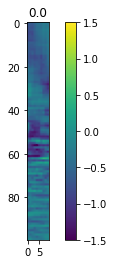

date:180401, rec:002, time:2836.0


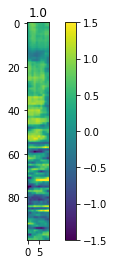

date:180401, rec:001, time:830.0


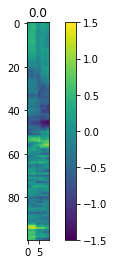

date:180325, rec:005, time:2706.0


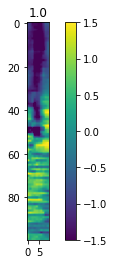

date:180401, rec:001, time:370.0


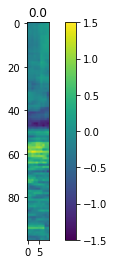

date:180325, rec:007, time:2946.0


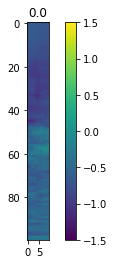

date:180325, rec:005, time:3759.0


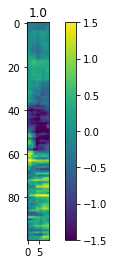

date:180325, rec:001, time:3790.0


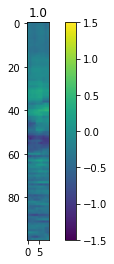

date:180323, rec:007, time:4341.0


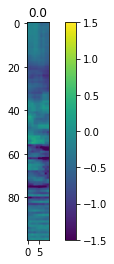

date:180323, rec:005, time:3933.0


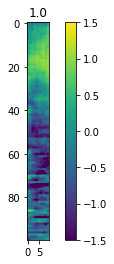

date:180401, rec:001, time:570.0


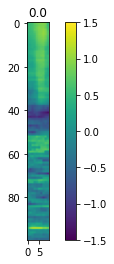

date:180325, rec:003, time:3092.0


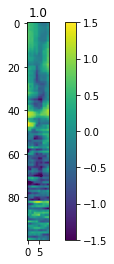

date:180325, rec:004, time:5476.0


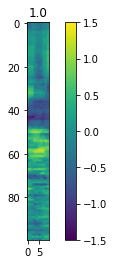

date:180324, rec:005, time:330.0


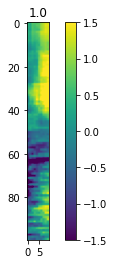

date:180324, rec:008, time:3157.0


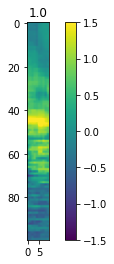

date:180325, rec:006, time:2432.0


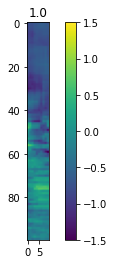

date:180325, rec:002, time:1499.0


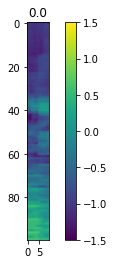

date:180322, rec:003, time:6646.0


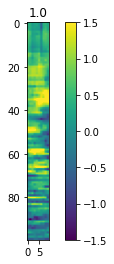

date:180325, rec:001, time:710.0


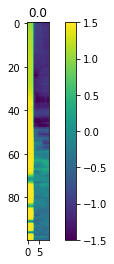

date:180325, rec:007, time:2223.0


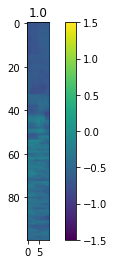

date:180325, rec:003, time:2956.0


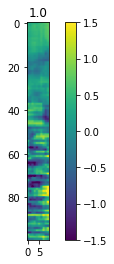

date:180324, rec:008, time:2668.0


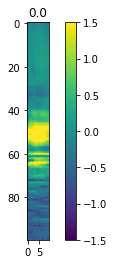

date:180322, rec:001, time:210.0


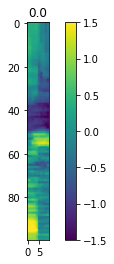

date:180324, rec:004, time:5159.0


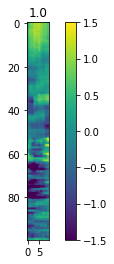

date:180401, rec:001, time:5713.0


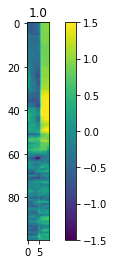

date:180325, rec:001, time:1560.0


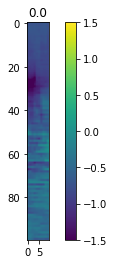

date:180325, rec:001, time:30.0


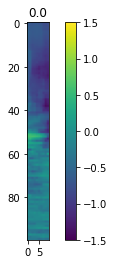

date:180323, rec:007, time:3045.0


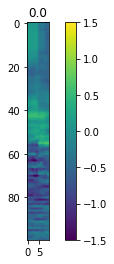

date:180325, rec:001, time:650.0


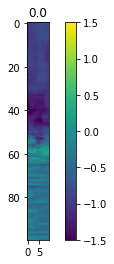

date:180325, rec:002, time:6415.0


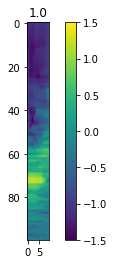

date:180324, rec:003, time:2747.0


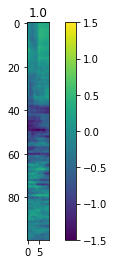

date:180325, rec:005, time:1174.0


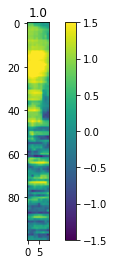

date:180325, rec:007, time:2523.0


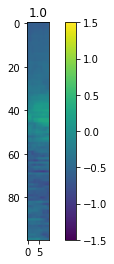

date:180324, rec:009, time:140.0


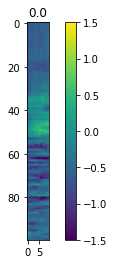

date:180323, rec:002, time:4286.0


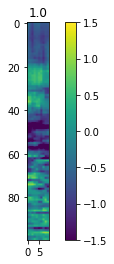

date:180324, rec:001, time:2467.0


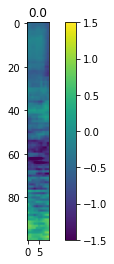

date:180324, rec:003, time:1849.0


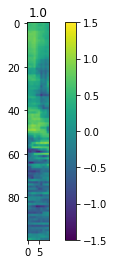

date:180322, rec:003, time:403.0


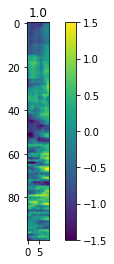

date:180322, rec:007, time:4920.0


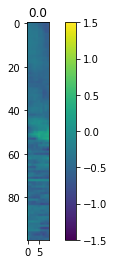

date:180324, rec:003, time:4095.0


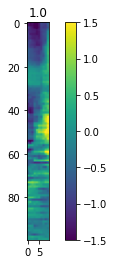

date:180325, rec:005, time:4963.0


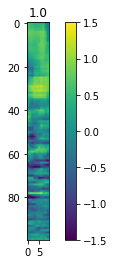

date:180325, rec:005, time:183.0


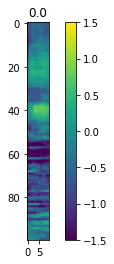

date:180322, rec:001, time:525.0


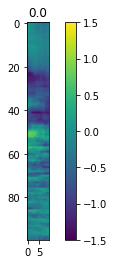

date:180325, rec:001, time:5397.0


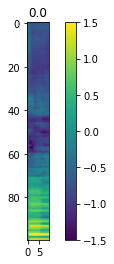

date:180325, rec:001, time:4966.0


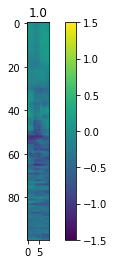

date:180322, rec:007, time:3499.0


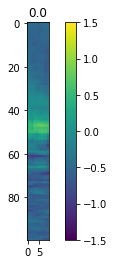

date:180324, rec:004, time:1649.0


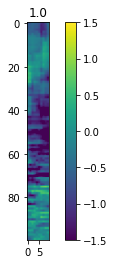

date:180325, rec:001, time:6350.0


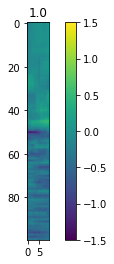

date:180324, rec:003, time:5538.0


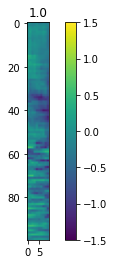

date:180324, rec:009, time:550.0


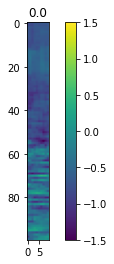

date:180325, rec:007, time:4733.0


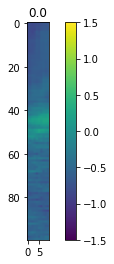

date:180325, rec:002, time:5418.0


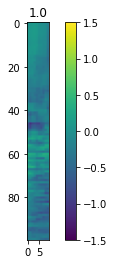

date:180324, rec:003, time:4345.0


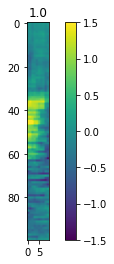

date:180325, rec:002, time:4588.0


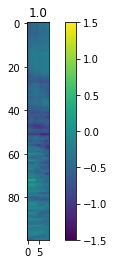

date:180324, rec:008, time:2498.0


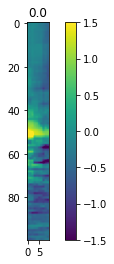

date:180322, rec:005, time:2681.0


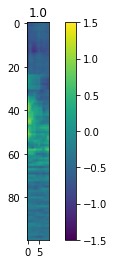

date:180401, rec:002, time:6746.0


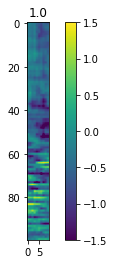

date:180325, rec:003, time:1061.0


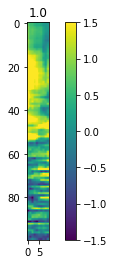

date:180324, rec:003, time:5608.0


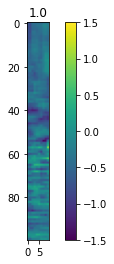

date:180325, rec:001, time:670.0


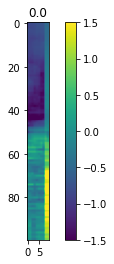

date:180325, rec:002, time:800.0


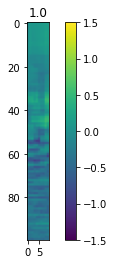

date:180325, rec:003, time:2605.0


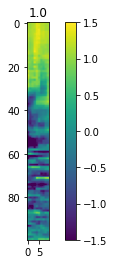

date:180322, rec:002, time:4739.0


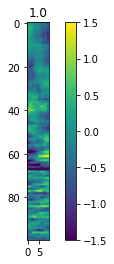

date:180322, rec:005, time:2841.0


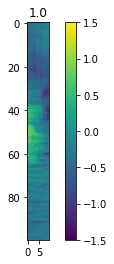

date:180325, rec:006, time:3783.0


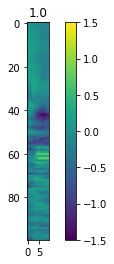

date:180324, rec:001, time:2231.0


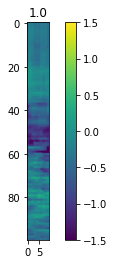

date:180323, rec:002, time:5335.0


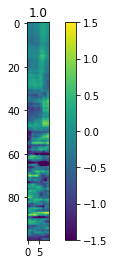

date:180325, rec:007, time:2906.0


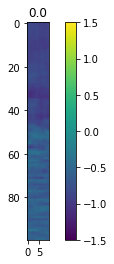

date:180324, rec:008, time:2888.0


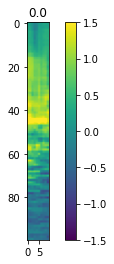

date:180325, rec:007, time:6233.0


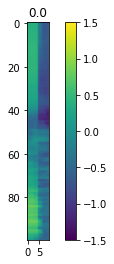

date:180401, rec:001, time:6613.0


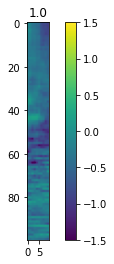

date:180325, rec:009, time:1490.0


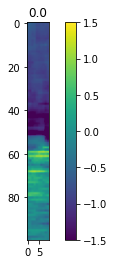

date:180324, rec:005, time:560.0


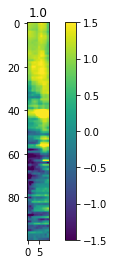

date:180401, rec:001, time:4637.0


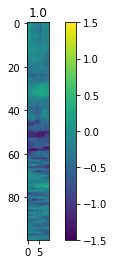

date:180325, rec:003, time:360.0


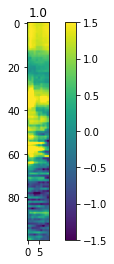

date:180325, rec:009, time:5505.0


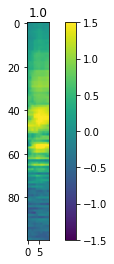

date:180322, rec:005, time:1805.0


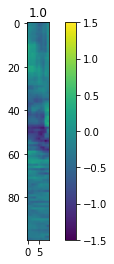

date:180323, rec:007, time:5481.0


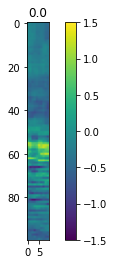

date:180322, rec:007, time:2193.0


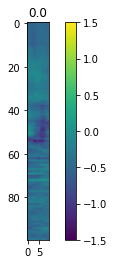

date:180324, rec:006, time:1022.0


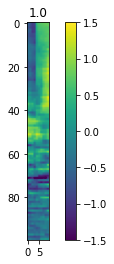

date:180322, rec:007, time:1587.0


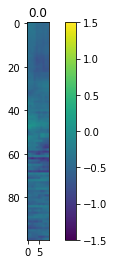

date:180325, rec:006, time:4145.0


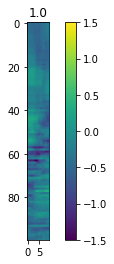

date:180323, rec:007, time:6161.0


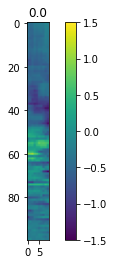

date:180401, rec:002, time:3386.0


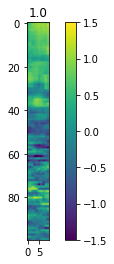

date:180324, rec:008, time:7064.0


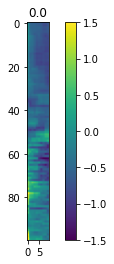

date:180322, rec:007, time:4980.0


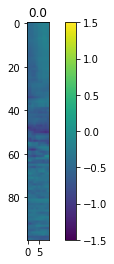

date:180324, rec:006, time:1533.0


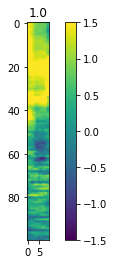

date:180322, rec:005, time:6909.0


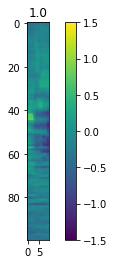

date:180324, rec:008, time:2488.0


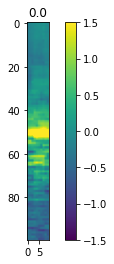

date:180325, rec:002, time:3889.0


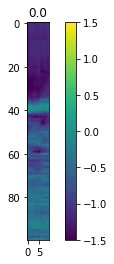

date:180325, rec:007, time:3942.0


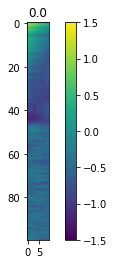

date:180325, rec:009, time:4619.0


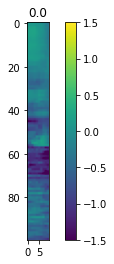

date:180322, rec:004, time:6953.0


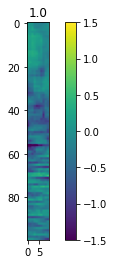

date:180322, rec:003, time:993.0


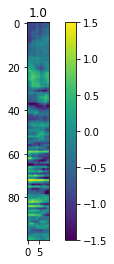

date:180323, rec:002, time:530.0


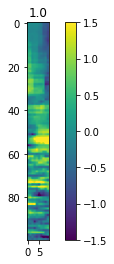

date:180324, rec:009, time:700.0


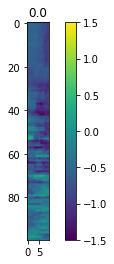

date:180324, rec:001, time:3675.0


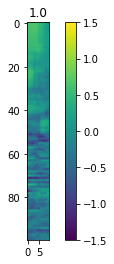

date:180325, rec:002, time:7049.0


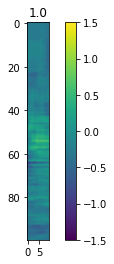

date:180325, rec:002, time:3879.0


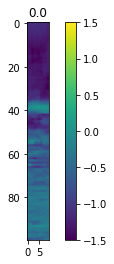

date:180324, rec:008, time:4200.0


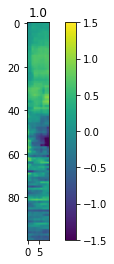

date:180324, rec:008, time:4879.0


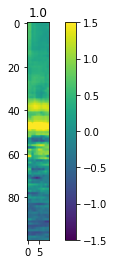

date:180324, rec:001, time:2467.0


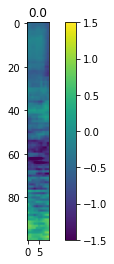

date:180323, rec:007, time:6221.0


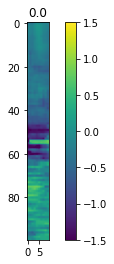

date:180325, rec:006, time:5188.0


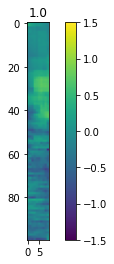

date:180322, rec:007, time:4500.0


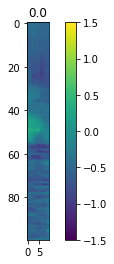

date:180323, rec:002, time:2696.0


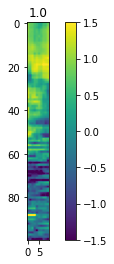

date:180323, rec:004, time:6384.0


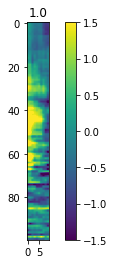

date:180325, rec:009, time:2440.0


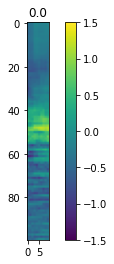

date:180325, rec:009, time:2786.0


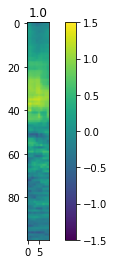

date:180325, rec:007, time:4843.0


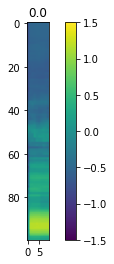

date:180325, rec:009, time:4849.0


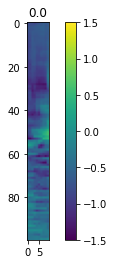

date:180325, rec:004, time:7070.0


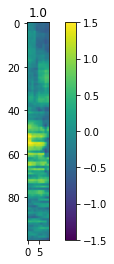

date:180324, rec:003, time:3337.0


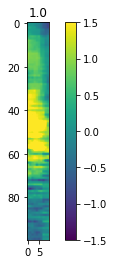

date:180324, rec:008, time:2638.0


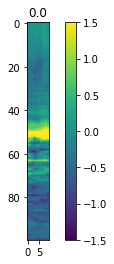

date:180401, rec:001, time:3393.0


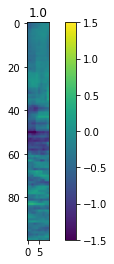

date:180401, rec:001, time:3143.0


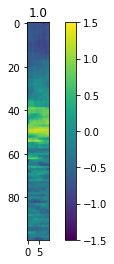

date:180323, rec:001, time:20.0


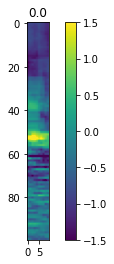

date:180401, rec:001, time:250.0


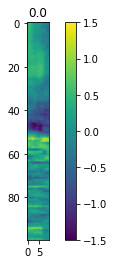

date:180323, rec:002, time:640.0


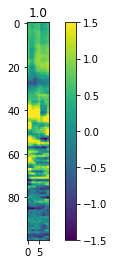

date:180325, rec:009, time:990.0


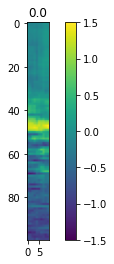

date:180325, rec:002, time:850.0


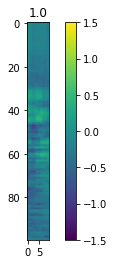

date:180322, rec:002, time:4129.0


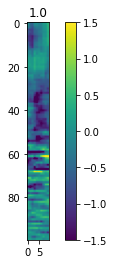

date:180322, rec:007, time:5030.0


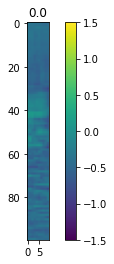

date:180322, rec:007, time:4610.0


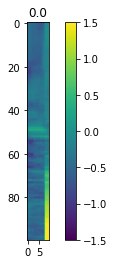

date:180322, rec:003, time:6996.0


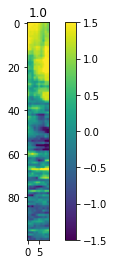

date:180325, rec:009, time:5869.0


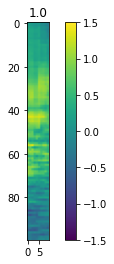

date:180325, rec:004, time:2298.0


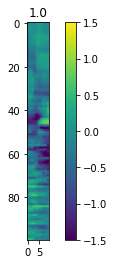

date:180324, rec:008, time:2221.0


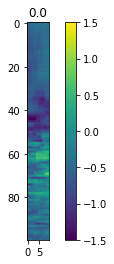

In [10]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

### Logistic regression with no regularization

In [11]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'none'


model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [12]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5237999558448792
Val loss for epoch 0: 0.5207856297492981
Train loss for epoch 1: 0.5031493306159973
Val loss for epoch 1: 0.5049718022346497
1
Train loss for epoch 2: 0.491366446018219
Val loss for epoch 2: 0.4867767095565796
2
Train loss for epoch 3: 0.4839782118797302
Val loss for epoch 3: 0.4905937612056732
Train loss for epoch 4: 0.47850891947746277
Val loss for epoch 4: 0.4744335412979126
4
Train loss for epoch 5: 0.47250643372535706
Val loss for epoch 5: 0.46778184175491333
5
Train loss for epoch 6: 0.4688657522201538
Val loss for epoch 6: 0.4688888192176819
Train loss for epoch 7: 0.4648726284503937
Val loss for epoch 7: 0.44286873936653137
7
Train loss for epoch 8: 0.4615451991558075
Val loss for epoch 8: 0.44403180480003357
Train loss for epoch 9: 0.46031734347343445
Val loss for epoch 9: 0.4237328767776489
9
Train loss for epoch 10: 0.45806023478507996
Val loss for epoch 10: 0.42676016688346863
Train loss for epoch 11: 0.45562222599983215
Val loss f

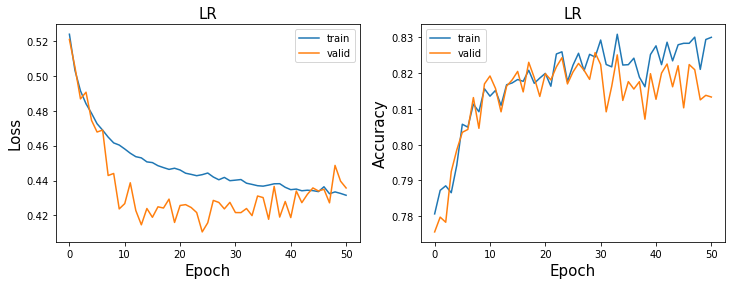

In [13]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

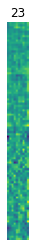

In [14]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [19]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))



test loss:0.562857985496521 accuracy:0.7348375740118419


In [20]:
np.mean(np.concatenate(test_labels))

0.7385182

In [22]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

date:180331, rec:005, time:4747.0, label:1.0
Original data 62 CH


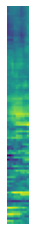

In [25]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

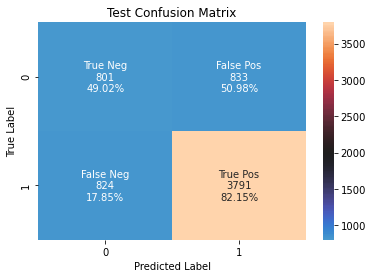

In [23]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

### Logistic regression with L2 regularization

In [26]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'l2'



model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [27]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5270999073982239
Val loss for epoch 0: 0.5196433663368225
Train loss for epoch 1: 0.5025756359100342
Val loss for epoch 1: 0.5160775184631348
1
Train loss for epoch 2: 0.49208906292915344
Val loss for epoch 2: 0.481641948223114
2
Train loss for epoch 3: 0.4848844110965729
Val loss for epoch 3: 0.47055286169052124
3
Train loss for epoch 4: 0.4786992371082306
Val loss for epoch 4: 0.4664524793624878
4
Train loss for epoch 5: 0.4745083749294281
Val loss for epoch 5: 0.467746764421463
Train loss for epoch 6: 0.4692044258117676
Val loss for epoch 6: 0.45154139399528503
6
Train loss for epoch 7: 0.46528032422065735
Val loss for epoch 7: 0.4580722451210022
Train loss for epoch 8: 0.462901771068573
Val loss for epoch 8: 0.4354649484157562
8
Train loss for epoch 9: 0.46054738759994507
Val loss for epoch 9: 0.44618508219718933
Train loss for epoch 10: 0.45813924074172974
Val loss for epoch 10: 0.4267992377281189
10
Train loss for epoch 11: 0.45715829730033875
Val loss f

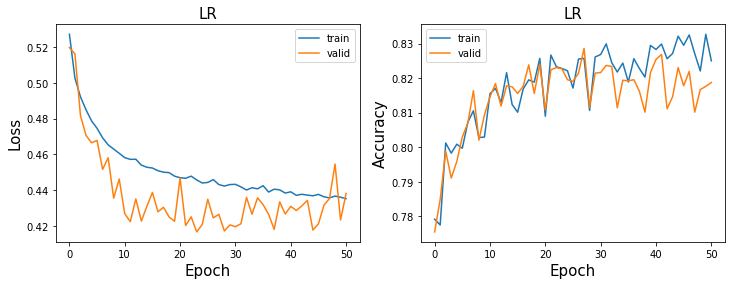

In [28]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

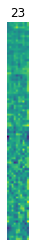

In [29]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [30]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_1 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5639472603797913 accuracy:0.7428388542166746


In [31]:
np.mean(np.concatenate(test_labels))

0.7385182

In [32]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_1, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

date:180331, rec:005, time:4747.0, label:1.0
Original data 62 CH


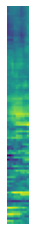

In [33]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][2], cases_wrong_1[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_1[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

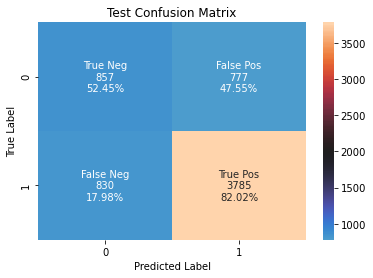

In [34]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [ ]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

### Logistic Regression with finite difference regularization

In [35]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0.1
model_type = 'LR'
loss_type = 'bce'
reg_type = 'finite_diff'

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [36]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.532504141330719
Val loss for epoch 0: 0.527908205986023
Train loss for epoch 1: 0.5057818293571472
Val loss for epoch 1: 0.5089386701583862
1
Train loss for epoch 2: 0.4947693943977356
Val loss for epoch 2: 0.49109622836112976
2
Train loss for epoch 3: 0.4858838617801666
Val loss for epoch 3: 0.475127249956131
3
Train loss for epoch 4: 0.48083341121673584
Val loss for epoch 4: 0.47577688097953796
Train loss for epoch 5: 0.47378772497177124
Val loss for epoch 5: 0.4543151557445526
5
Train loss for epoch 6: 0.47119763493537903
Val loss for epoch 6: 0.45061489939689636
6
Train loss for epoch 7: 0.46713757514953613
Val loss for epoch 7: 0.4525666832923889
Train loss for epoch 8: 0.4642995595932007
Val loss for epoch 8: 0.44904112815856934
8
Train loss for epoch 9: 0.4619355797767639
Val loss for epoch 9: 0.45197081565856934
Train loss for epoch 10: 0.45963940024375916
Val loss for epoch 10: 0.4318523406982422
10
Train loss for epoch 11: 0.45905473828315735
Val los

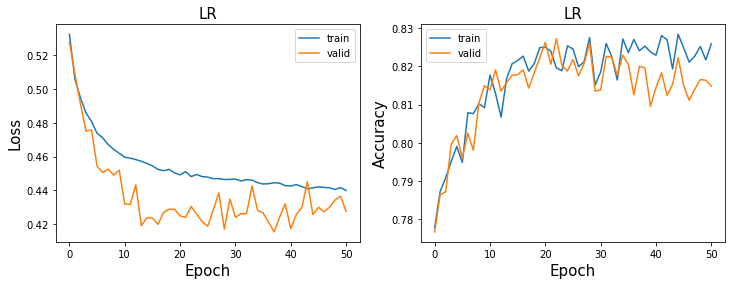

In [37]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

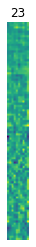

In [38]:
model = GLM(input_dim=100*10).to(device)
path = model_saving_path
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}_REDUCEsum.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [39]:
## Calculate accuracy and test loss
test_loss, test_acc, test_preds, test_preds_probs, test_labels,_,_,_, cases_wrong_2 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))


test loss:0.5647691488265991 accuracy:0.7426788286125781


In [40]:
np.mean(np.concatenate(test_labels))

0.7385182

In [41]:
path_wrong = '/mnt/pesaranlab/People/Capstone_students/Yue/wrong_pred'
pickle.dump(cases_wrong_2, open('{}/{}_CH{}_LOSS{}_REG{}{}.pt'.format(path_wrong, model_type, CH, loss_type, reg_type, alpha), 'wb'))

date:180331, rec:005, time:4747.0, label:1.0
Original data 62 CH


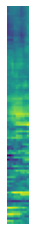

In [42]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][2], cases_wrong_2[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_2[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

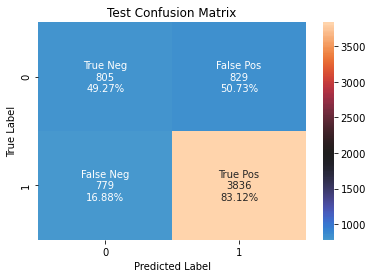

In [43]:
## Confusion matrix
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm_test.flatten()]

TNR = int(group_counts[0]) / (int(group_counts[0])+int(group_counts[1]))
FPR = 1 - TNR
TPR = int(group_counts[3]) / (int(group_counts[3])+int(group_counts[2]))
FNR = 1-TPR
group_percentages =[TNR, FPR, FNR, TPR]

group_percentages = ["{0:.2%}".format(value) for value in
                     group_percentages]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(cm_test, annot=labels, fmt='', center = 2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

### SVM without regularization

In [21]:
device = torch.device('cuda')

tol = 0.01
learning_rate = 0.001
num_epochs = 51
alpha = 0 
model_type = 'SVM'
loss_type = 'hinge'
reg_type = 'none' # expect to be bad, since predictions could be arbitrarily far from boundaries

model = GLM(input_dim=100*10).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [15]:
epochs, training_losses, training_acc, val_losses, validation_acc = [], [], [], [], []

for epoch in range(num_epochs):
    train_loss, train_acc = train(model, optimizer, train_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Train loss for epoch {}: {}'.format(epoch, train_loss))
    val_loss, val_acc = evaluate(model, optimizer, val_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=False, device=device)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            best_epoch = epoch
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    if train_loss < tol:
        break

Train loss for epoch 0: 0.5633243322372437
Val loss for epoch 0: 0.6515001654624939
Train loss for epoch 1: 0.5354222655296326
Val loss for epoch 1: 0.6230804324150085
1
Train loss for epoch 2: 0.5250371098518372
Val loss for epoch 2: 0.5986531376838684
2
Train loss for epoch 3: 0.5187399387359619
Val loss for epoch 3: 0.6033577919006348
Train loss for epoch 4: 0.516137421131134
Val loss for epoch 4: 0.6111773252487183
Train loss for epoch 5: 0.5122883915901184
Val loss for epoch 5: 0.5754786133766174
5
Train loss for epoch 6: 0.5103127360343933
Val loss for epoch 6: 0.5845819711685181
Train loss for epoch 7: 0.5089962482452393
Val loss for epoch 7: 0.6389201879501343
Train loss for epoch 8: 0.5068846344947815
Val loss for epoch 8: 0.609408438205719
Train loss for epoch 9: 0.5067763924598694
Val loss for epoch 9: 0.5766943097114563
Train loss for epoch 10: 0.5029414892196655
Val loss for epoch 10: 0.6333111524581909
Train loss for epoch 11: 0.5027903914451599
Val loss for epoch 11: 0.6

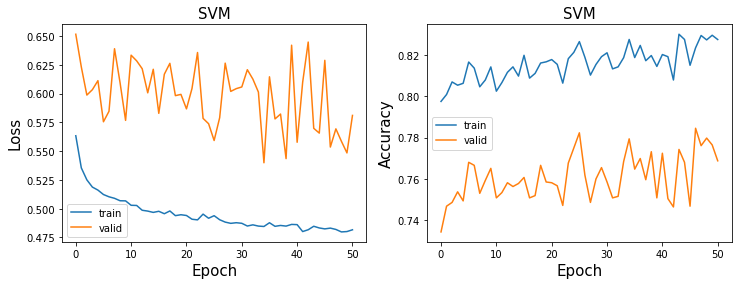

In [16]:
plot_loss_acc(training_losses, val_losses, training_acc, validation_acc, model_type)

In [22]:
best_epoch = 34

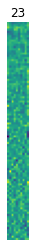

In [23]:
model = GLM(input_dim=100*10).to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/{}_CH{}_LOSS{}_REG{}{}_EPOCH{}.pt'.format(path, model_type, CH, loss_type, reg_type, alpha, best_epoch)))
weights = model.linear.weight.view(100, 10)
weights_sub = weights.detach().cpu()
plt.axis('off')
plt.imshow(weights_sub)
plt.title(str(CH))
# plt.clim(-0.03, 0.03)
plt.show()

In [24]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_3 = evaluate(model, optimizer, test_loader, alpha=alpha, model_type=model_type, loss_type=loss_type, reg_type=reg_type, collect_result=True, device=device)
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.7474792003631592 accuracy:0.6978461538461539


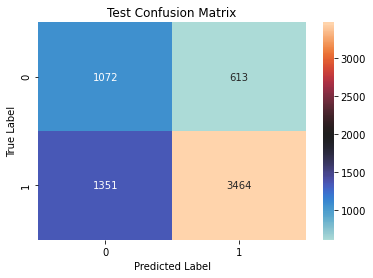

In [25]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=2000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:004, time:004, label:1.0
Original data 62 CH


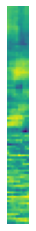

In [26]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_3[0][0], cases_wrong_3[0][1], cases_wrong_3[0][1], cases_wrong_3[0][3]))
print('Original data 62 CH')
weights_sub = cases_wrong_3[0][-1][0]
plt.axis('off')
plt.imshow(weights_sub)
# plt.clim(-0.03, 0.03)
plt.show()

### SVM with L2 regularization

### SVM with finite difference regularization